In [1]:
# Работа с данными 
import pandas as pd
import numpy as np

# Балансировка
from imblearn.over_sampling import SMOTE

# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Классификаторы
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

# Оценка качества
from yellowbrick.classifier import ROCAUC
from catboost.utils import get_confusion_matrix
from yellowbrick.contrib.wrapper import wrap

# Визуалцияция результатов обучения
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

#Заполнение пропусков
from sklearn.impute import SimpleImputer


### Задание 1

In [2]:
#1.1
#загрузка датасетов
data_goal = pd.read_csv('goal_cipher.csv')
data_feature = pd.read_csv('feature_data_new_mini.csv')

C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_14676\162387297.py:4: DtypeWarning: Columns (113,116,119,122,125) have mixed types. Specify dtype option on import or set low_memory=False.
  data_feature = pd.read_csv('feature_data_new_mini.csv')


In [3]:
data_goal

,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
0,0,134,171.0,1.0,2021-01,Дуриан,Момордика,Мармеладный плод,12
1,3,134,166.0,1.0,2021-01,Маракуйя,Либерика,Салакка,12
2,4,240,1068.0,1.0,2021-01,Земляной орех,Абрикос,Пара-гуайява,5
3,7,240,2200.0,1.0,2021-01,Маракуйя,Гранат,Мармеладный плод,17
4,9,240,2734.0,1.0,2021-01,Земляной орех,Бананы,Гнетум гнемон,4
...,...,...,...,...,...,...,...,...,...
53034,147570,240,1837.0,1.0,2018-11,Земляной орех,Свечное дерево,Мармеладный плод,11
53035,147572,145,84.0,1.0,2018-11,Земляной орех,Свечное дерево,Мармеладный плод,19
53036,147573,145,573.0,1.0,2018-11,Земляной орех,Огуречное дерево,Мармеладный плод,14
53037,147574,240,1506.0,2.0,2018-11,Земляной орех,Кумкват овальный,Горлянка,6


In [4]:
#датасет по моему фрукту
#1.2
data_goal=data_goal[data_goal['fail_reason'] == 'Антильский крыжовник']
data_goal

,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
88,222,240,2643.0,1.0,2021-01,Карамбола,Антильский крыжовник,Помпельмус,18
396,1062,530,1363.0,2.0,2021-01,Карамбола,Антильский крыжовник,Пара-гуайява,2
762,2028,123,1446.0,1.0,2021-01,Карамбола,Антильский крыжовник,Пара-гуайява,15
914,2446,240,862.0,1.0,2021-01,Карамбола,Антильский крыжовник,Пара-гуайява,16
1316,3465,244,122.0,1.0,2021-02,Карамбола,Антильский крыжовник,Пара-гуайява,3
...,...,...,...,...,...,...,...,...,...
52722,146749,240,16.0,1.0,2018-09,Карамбола,Антильский крыжовник,Пара-гуайява,29
52757,146910,226,995.0,2.0,2018-09,Карамбола,Антильский крыжовник,Помпельмус,2
52800,147073,240,34.0,1.0,2018-09,Карамбола,Антильский крыжовник,Пара-гуайява,27
52805,147090,240,1058.0,1.0,2018-09,Карамбола,Антильский крыжовник,Помпельмус,2


In [5]:
#Преобразование массива goal_cipher, путем удаления ненужных столбцов:
#fail_place; fail_reason; fail_type
data_goal = data_goal[['ser_loc','zns_loc','prs_loc','year_month', 'day']]
print(data_goal)

#Перевод названий колонок в нижний регистр
data_goal.columns = [x.lower() for x in data_goal.columns]

#Преобразования типов данных в int() в столбце day
data_goal['day'] = [int(x) for x in data_goal['day']]
data_feature.head()

#Обработка данных типа date() в столбце year_month
data_feature['year_month'] = pd.to_datetime(data_feature['year_month'], format='%Y-%m')
data_goal['year_month'] = pd.to_datetime(data_goal['year_month'], format='%Y-%m')
data_feature['year_month'] = data_feature['year_month'].dt.to_period('M')
data_goal['year_month'] = data_goal['year_month'].dt.to_period('M')

       ser_loc  zns_loc  prs_loc year_month  day
88         240   2643.0      1.0    2021-01   18
396        530   1363.0      2.0    2021-01    2
762        123   1446.0      1.0    2021-01   15
914        240    862.0      1.0    2021-01   16
1316       244    122.0      1.0    2021-02    3
...        ...      ...      ...        ...  ...
52722      240     16.0      1.0    2018-09   29
52757      226    995.0      2.0    2018-09    2
52800      240     34.0      1.0    2018-09   27
52805      240   1058.0      1.0    2018-09    2
53001      123   1370.0      1.0    2018-11   13

[721 rows x 5 columns]


C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_14676\2466494387.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_goal['day'] = [int(x) for x in data_goal['day']]
C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_14676\2466494387.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_goal['year_month'] = pd.to_datetime(data_goal['year_month'], format='%Y-%m')
C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_14676\2466494387.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

### Задание 2

Объединения массива целей с массивом признаков

In [6]:
goal_feature = data_goal.merge(data_feature, on=['ser_loc', 'zns_loc', 'prs_loc','year_month'],how = 'outer')
goal_feature

,ser_loc,zns_loc,prs_loc,year_month,day,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,240,2643.0,1.0,2021-01,18.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,530,1363.0,2.0,2021-01,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123,1446.0,1.0,2021-01,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,240,862.0,1.0,2021-01,16.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,244,122.0,1.0,2021-02,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167914,693,74.0,3.0,2019-03,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,0.0,0.0
167915,693,74.0,3.0,2021-04,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,51.0,51.0
167916,693,74.0,3.0,2021-05,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,55.0,55.0
167917,693,74.0,3.0,2021-07,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,64.0,64.0


Поиск и чистка плохих столбцов

In [7]:
data_new = goal_feature.dropna(subset = ['count_fail'])

In [8]:
data_new = data_new.drop(columns=['date_repair_finish_y_1',
       'date_repair_finish_x_2',
       'date_repair_finish_y_2', 'date_repair_finish', 
       'date_repair_finish_x_1'])

### Задание 3

In [9]:
#количество пропусков
data_new['day'].isnull().sum()

167196

In [10]:
#заполнение пропусков в столбце day нулями, если данные есть то единицы
data_new['day'] = [1 if x > 0 else 0 for x in data_new['day']]
data_new['day'].value_counts()

0    167196
1       176
Name: day, dtype: int64

### Задание 4

#### Выбираю модель классификации

### Задание 5

#### Сделал в третьем задании

### Задание 6

#### Нормирование данных

In [11]:
df_ind = data_new.set_index(['ser_loc','zns_loc','prs_loc','year_month'])

In [12]:
#нормирование данных
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df_ind) 
data_norm = pd.DataFrame(scaled, columns=df_ind.columns,index=df_ind.index)

In [13]:
#Разделим набор данных на признаки и метки
X = data_norm.drop(columns=['day'])
y = data_norm[['day']]

In [15]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

In [16]:
#тестовые и тренировочные выборки
X_train, X_test, y_train, y_test = train_test_split(\
X_res, y_res, test_size=0.33, random_state=42)

### Задание 7

#### Обучение по модели

In [17]:
from catboost import CatBoostClassifier, Pool

clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)

In [18]:
clf.fit(X_train, y_train,         
        eval_set=(X_test, y_test), 
        verbose=False
)

#### Проверка точности модели, на нормированных данных

In [19]:
clf.score(X, y)

0.9994144779294027

#### Проверка точности, на тестовых данных

In [20]:
clf.score(X_test, y_test) 

0.9992478477571364

#### Проверка точности модели, метрикой f1-score

In [21]:
from sklearn.metrics import f1_score

f1_score(y['day'], clf.predict(X))

0.72

#### Построение матрицы confusion

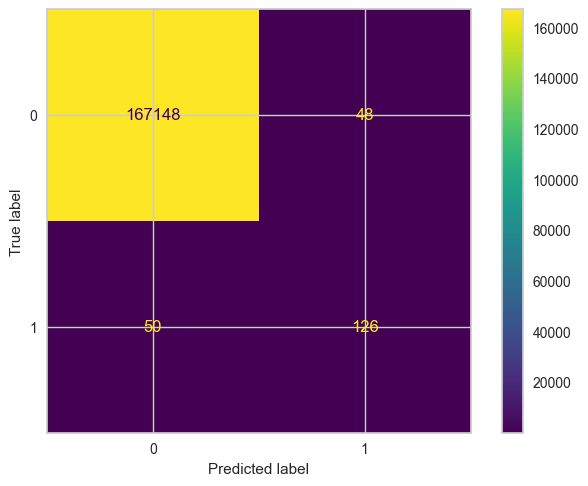

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y['day'], clf.predict(X), labels=clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp_rf.plot()

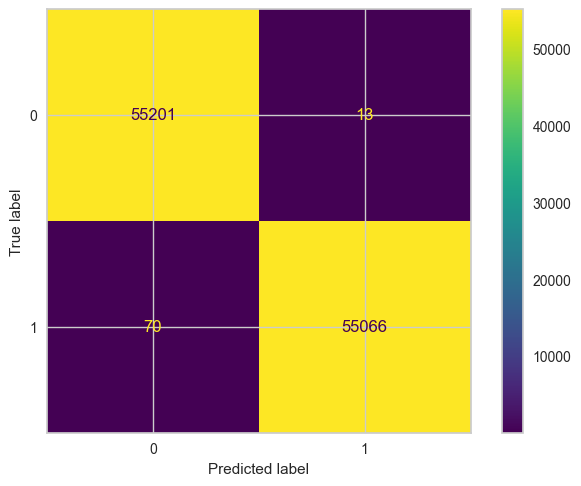

In [23]:
cmm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

### Задание 8

In [24]:
#8.1
def f1_score_my():
    tn, fp, fn, tp = cm.ravel()
    precission = tp/(tp+fp)
    recall = tp/(tp+fn)
    return 2*(precission*recall)/(precission+recall)


In [25]:
#8.2
print(f"Встроенная функция: {f1_score(y['day'], clf.predict(X))}, моя функция:{f1_score_my()}")
print("Отличий нет")

Встроенная функция: 0.72, моя функция:0.72
Отличий нет
